In [1]:
import numpy as np
from scipy import stats
import astropy
from astropy.table import Table
from astropy.nddata import CCDData
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy import wcs
import ccdproc
from ccdproc import trim_image
import PIL
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## To create a training set, we need to read in both the MeerKAT FITS files and the modified Aegean Catalog, which will give the centroids of the images
### These centroids will be in Galactic coords, which will need to be converted into matrix coords (x-y) for the purpose of creating cut-outs

Importing FITS File:

In [2]:
radioFrame = CCDData.read(r'C:\Users\clent\Documents\4th Year Project Code\MeerKAT FITS\G288.5-0.5IFx_Mosaic_Mom0.fits', unit='Jy')
print(np.nanmax(radioFrame))

INFO: using the unit Jy passed to the FITS reader instead of the unit JY/BEAM in the FITS file. [astropy.nddata.ccddata]


0.3859355960387862


Importing Multi-Source Island Catalog Table:

In [3]:
catalog = Table.read(r'C:\Users\clent\Documents\4th Year Project Code\MeerKAT Catalogs\G288.5-0.5_FINAL.vot')
print(catalog.colnames)

['island', 'lon', 'lat']


Converting the catalog to a list of coordinates

In [4]:
longitudes = np.array(catalog['lon'])
latitudes = np.array(catalog['lat'])

coords = list(zip(longitudes, latitudes))
print(coords)

[(288.1781561977266, -2.0622920094924186), (288.66372410676945, -2.0396472940939168), (287.3093470356871, -2.0412115715739656), (287.86193735609385, -2.004888596633844), (289.98918443084926, -1.8932172693883924), (289.7651081560663, -1.869156294883732), (287.8246239869362, -1.8153786468346405), (287.289453480572, -1.811401143082125), (289.52697853794126, -1.814654814993942), (288.0660841146462, -1.7916419118026141), (289.4100296747523, -1.77614587807523), (289.27607447824744, -1.7603655655684483), (290.0144249470418, -1.744367074908689), (287.74823391494294, -1.7373857537339092), (288.5665835399855, -1.7395255162695293), (289.76682080512694, -1.7339110885069362), (289.73465159869596, -1.7295423517265378), (288.42774023062907, -1.719257739435016), (288.6703141483855, -1.7188301369262997), (288.85630648558913, -1.7086353673644004), (289.9064042990251, -1.6992998572728215), (287.5122170735407, -1.6965600449324314), (287.78966329691303, -1.6889753696567087), (287.2813414192054, -1.65994719

Converting Galactic coords to Matrix coords

In [5]:
hdulist = radioFrame.to_hdu()
w = wcs.WCS(hdulist[0].header)
matrix_coords = w.wcs_world2pix(coords, 1)
print(matrix_coords)

# https://het.as.utexas.edu/HET/Software/Astropy-1.0/wcs/index.html

[[4.52192070e+03 9.45164134e-01]
 [3.35731166e+03 5.52865892e+01]
 [6.60554813e+03 5.12796481e+01]
 [5.28038117e+03 1.38608547e+02]
 [1.78310769e+02 4.06203248e+02]
 [7.15602782e+02 4.64045527e+02]
 [5.37005124e+03 5.93285480e+02]
 [6.65364356e+03 6.02644615e+02]
 [1.28661970e+03 5.94912882e+02]
 [4.79087899e+03 6.50287825e+02]
 [1.56707007e+03 6.87352077e+02]
 [1.88835737e+03 7.25256805e+02]
 [1.17487744e+02 7.63335076e+02]
 [5.55335729e+03 7.80402030e+02]
 [3.59027320e+03 7.75370233e+02]
 [7.11270015e+02 7.88549364e+02]
 [7.88415539e+02 7.99046607e+02]
 [3.92334532e+03 8.24001553e+02]
 [3.34143059e+03 8.25023221e+02]
 [2.89525022e+03 8.49467283e+02]
 [3.76453162e+02 8.71529418e+02]
 [6.11952224e+03 8.78286616e+02]
 [5.45402364e+03 8.96571959e+02]
 [6.67333256e+03 9.66045797e+02]
 [5.75368390e+02 9.68744088e+02]
 [1.88535051e+03 9.92778342e+02]
 [4.77174918e+03 1.00383075e+03]
 [1.18144500e+01 9.99654088e+02]
 [1.10427893e+03 1.06244409e+03]
 [3.48884622e+03 1.06266249e+03]
 [6.411149

Creating Cutout2D objects from Sky Coords

In [22]:
n = 79
example = Cutout2D(radioFrame, matrix_coords[n], size=64)
print(example.data)
print(np.max(example.data))
print(matrix_coords[n])

[[1.69813743e-04 1.71366067e-04 1.66683912e-04 ... 4.59503294e-05
  4.46135466e-05 4.01682911e-05]
 [1.80122611e-04 1.77620942e-04 1.68803173e-04 ... 4.71476787e-05
  4.82455919e-05 4.44081327e-05]
 [1.81803793e-04 1.75055239e-04 1.63388409e-04 ... 4.98870353e-05
  5.20591642e-05 4.82635337e-05]
 ...
 [1.34879902e-04 1.25054929e-04 1.12524114e-04 ... 4.69493669e-05
  4.68641763e-05 4.79105500e-05]
 [1.33912193e-04 1.22444971e-04 1.09770883e-04 ... 4.40302775e-05
  4.49277084e-05 4.77213247e-05]
 [1.35170183e-04 1.22318969e-04 1.09632373e-04 ... 4.19342672e-05
  4.36749386e-05 4.78249341e-05]]
0.02502630641188452
[2146.10657818 3012.57818898]


Saving example as a Image File for verification

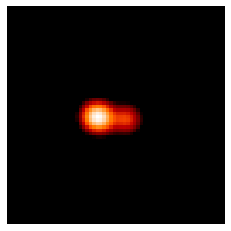

In [24]:
thresh = 10**-3.1
log_example = np.copy(example.data)
log_example[log_example<thresh] = thresh
plt.imshow(log_example, cmap='gist_heat', origin='lower', norm=colors.LogNorm())
plt.axis('off')

plt.savefig(r'C:\Users\clent\Documents\4th Year Project Code\288.5 Training Set\%s.png' %n, format='png')